# RESD dataset
7 classes: Anger, Disgust, Fear, Happiness, Neutral, Sadness, Enthusiasm

https://huggingface.co/datasets/Aniemore/resd

https://paperswithcode.com/dataset/resd

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# load dataset
splits = {'train': 'data/train-00000-of-00001-1f5fe73d1293189c.parquet', 'test': 'data/test-00000-of-00001-a2b788d59856c4ae.parquet'}
df = pd.read_parquet("hf://datasets/Aniemore/resd_annotated/" + splits["train"])

df.head()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


name  \
0  32_happiness_enthusiasm_h_120   
1     36_disgust_happiness_d_130   
2            34_anger_fear_a_060   
3         25_anger_disgust_a_010   
4       17_neutral_disgust_d_092   

                                                path  \
0  happiness_enthusiasm_32/32_happiness_enthusias...   
1  disgust_happiness_36/36_disgust_happiness_d_13...   
2              anger_fear_34/34_anger_fear_a_060.wav   
3        anger_disgust_25/25_anger_disgust_a_010.wav   
4    neutral_disgust_17/17_neutral_disgust_d_092.wav   

                                              speech  \
0  {'bytes': b'RIFF\xe2\x97\x02\x00WAVEfmt \x10\x...   
1  {'bytes': b'RIFF.\x85\x01\x00WAVEfmt \x10\x00\...   
2  {'bytes': b'RIFFp\xa7\x01\x00WAVEfmt \x10\x00\...   
3  {'bytes': b'RIFFr\xe4\x06\x00WAVEfmt \x10\x00\...   
4  {'bytes': b'RIFF\xf2H\x07\x00WAVEfmt \x10\x00\...   

                                                text    emotion  
0  Конечно, расскажу, обязательно. Ой, сейчас рас...  happiness  
1                Вы ещё и профессию решили поменять.    disgust  
2            Ты знаешь, чем это для тебя закончится?      anger  
3  Добрый день. Вы хотели бы приобрести недвижимо...      anger  
4  все ваши рекламные акции, пожалуйста, больше н...    disgust

In [ ]:
colors = {'happiness':'#FFFF00', 'disgust':'#808000','anger':'#FF0000','fear':'#008080','enthusiasm':'#FF00FF','neutral':'#C0C0C0','sadness':'#000080'}


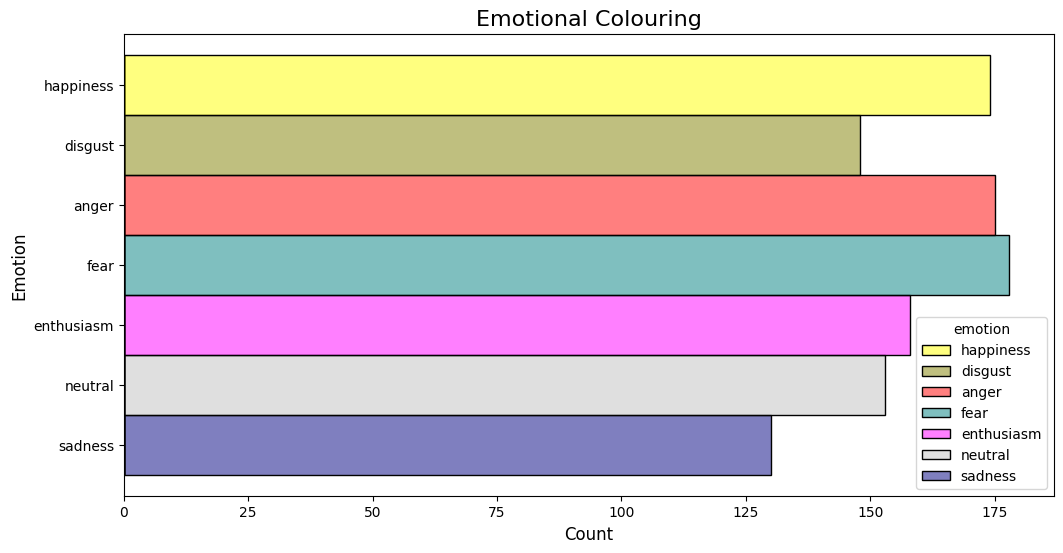

In [ ]:
plt.figure(figsize = (12,6))
ax = sns.histplot(data=df, y='emotion', hue = 'emotion', palette = colors, kde = False)
ax.set_title('Emotional Colouring',fontsize = 16)
ax.set_xlabel('Count', fontsize = 12)
ax.set_ylabel('Emotion', fontsize = 12)
plt.show()

# Word cloud

In [ ]:
!pip install stop-words

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32894 sha256=670b840b7e986472982837779dd7599df987c0dc54ceadea6273d481286b262c
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


In [ ]:
import re
from wordcloud import WordCloud
from stop_words import get_stop_words


STOPWORDS_RU = get_stop_words('russian')

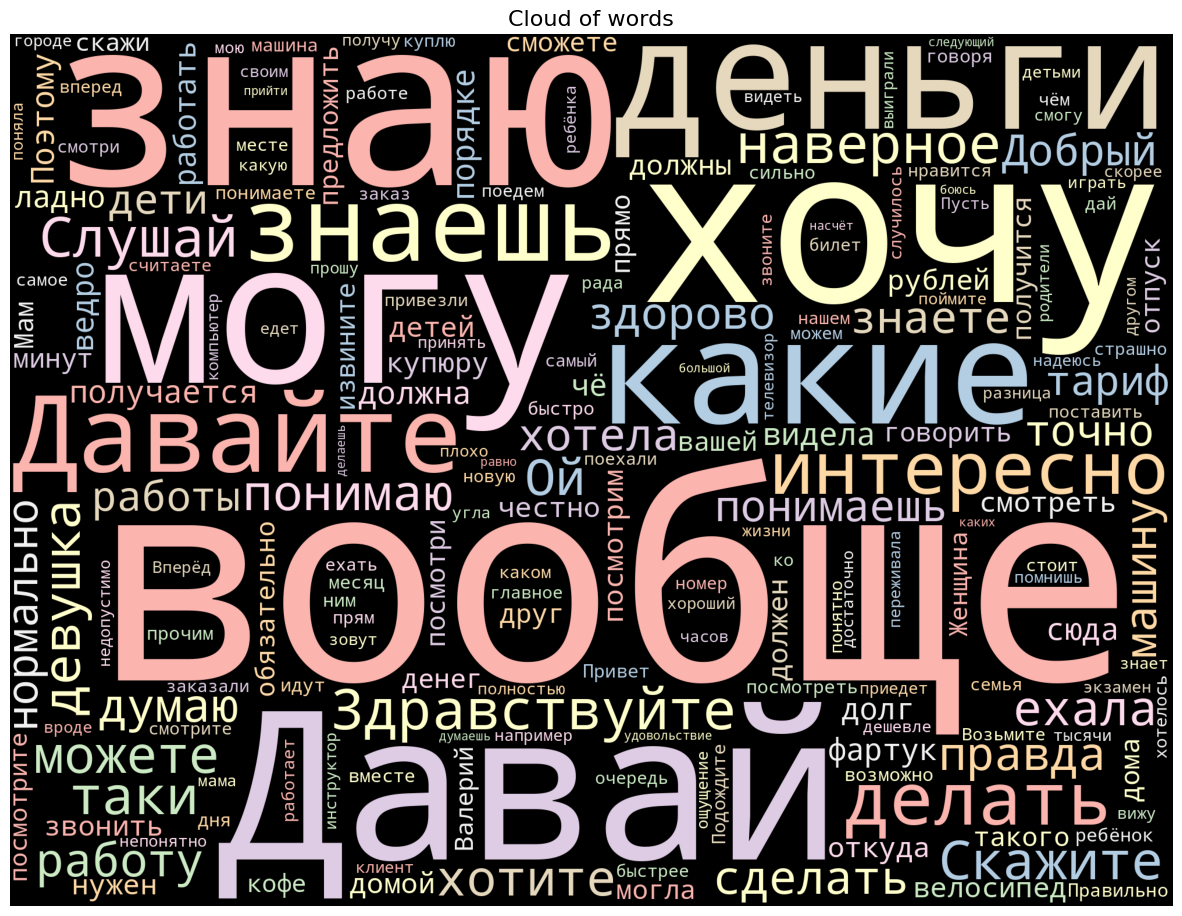

In [ ]:
text = df['text'].str.cat(sep=' ')
text = re.sub(r'==.*?==+', '', text)
text = text.replace('\n', ' ')

wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      random_state=42,
                      background_color='black',
                      margin=10,
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = STOPWORDS_RU).generate(text)

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis("off")
plt.title ('Cloud of words',fontsize = 16)
plt.show()

# TODO

In [ ]:
%pip install pymorphy2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 58.4 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=1f0c1b333fa22578d1498d76f1891f18edc5f8927fddb5b1929dee28066598be
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import nltk
import pymorphy2
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from pymystem3 import Mystem
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df.shape

(1116, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     1116 non-null   object
 1   path     1116 non-null   object
 2   speech   1116 non-null   object
 3   text     1116 non-null   object
 4   emotion  1116 non-null   object
dtypes: object(5)
memory usage: 43.7+ KB


In [ ]:
df[df.text.str.len()==0]

Empty DataFrame
Columns: [name, path, speech, text, emotion]
Index: []

In [ ]:
morf = pymorphy2.MorphAnalyzer()

def preprocess(text, use_stemming=False, use_lemmatization=True):
    # Удаляем гиперссылки
    text = re.sub(r'http\S+', '', text)
    # Убираем знаки препинания
    text = re.sub(r'[^\w\s]', '', text)
    # Приводим текст к нижнему регистру для унификации
    text = text.lower()
    # Разбиваем текст на отдельные слова (токенизация)
    words = word_tokenize(text)
    # Фильтруем стоп-слова
    stop_words = set(stopwords.words('russian'))
    words = [word for word in words if word not in stop_words]

    # Если включен режим стемминга, обрезаем окончания слов
    # if use_stemming:
        #stemmer = SnowballStemmer('russian')
        #words = [stemmer.stem(word) for word in words]

    # Если включена лемматизация, преобразуем слова к их начальной форме
    if use_lemmatization:
        words = [morf.parse(word)[0].normal_form for word in words]

    # Соединяем обработанные слова обратно в строку
    processed_text = ' '.join(words)

    return processed_text

In [ ]:
df['cleared_text'] = df['text'].apply(preprocess)
display(df['text'].head().to_list())
df['cleared_text'].head().to_list()

['Конечно, расскажу, обязательно. Ой, сейчас расскажу.',
 'Вы ещё и профессию решили поменять.',
 'Ты знаешь, чем это для тебя закончится?',
 'Добрый день. Вы хотели бы приобрести недвижимость? Я с удовольствием вам помогу.',
 'все ваши рекламные акции, пожалуйста, больше не парьте мне мозги и слезьте с моих ушей, хорошо?']

['рассказать обязательно ой рассказать',
 'ещё профессия решить поменять',
 'знать это закончиться',
 'добрый день хотеть приобрести недвижимость удовольствие помочь',
 'ваш рекламный акция пожалуйста парить мозг слезть мой ухо']

In [ ]:
word_count = Counter(' '.join(df.cleared_text).split())
print(word_count.most_common(15))

[('это', 221), ('всё', 103), ('знать', 96), ('хотеть', 84), ('мочь', 72), ('ты', 71), ('такой', 68), ('очень', 64), ('вообще', 64), ('быть', 63), ('давать', 62), ('сказать', 54), ('просто', 54), ('пожалуйста', 53), ('ребёнок', 46)]


In [ ]:
exception = {'всё','ты','такой','просто'}

In [ ]:
stop_words = set(stopwords.words('russian'))
stop_words.update(exception)

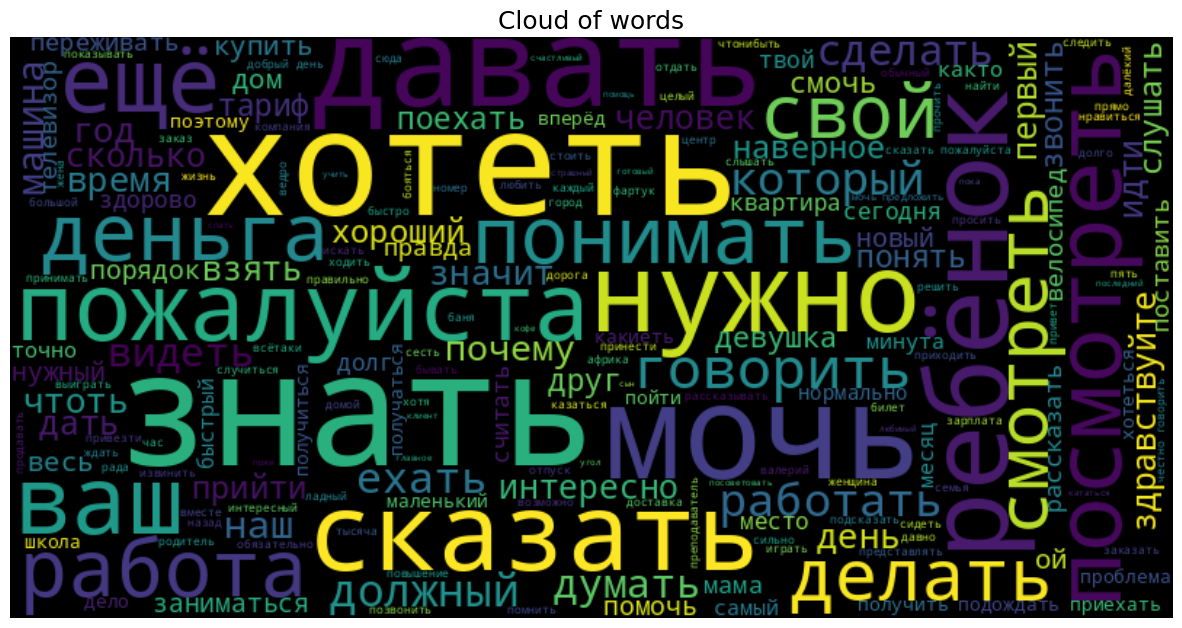

In [ ]:
text_data = ' '.join([word for text in df.cleared_text.tolist() for word in text.split() if word.lower() not in stop_words])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text_data)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title ('Cloud of words',fontsize = 18)
plt.show()



In [ ]:
#df.drop(['nouns','adjectives'], axis = 1, inplace = True)

In [ ]:
def extract_nouns_adjectives_verbs(words):
    nouns = []
    adjectives = []
    verbs = []
    for word in words.split():
        parsed_word = morf.parse(word)[0]
        pos = parsed_word.tag.POS  # Часть речи
        if pos == 'NOUN':
            nouns.append(word)
        elif pos == 'ADJF':
            adjectives.append(word)
        elif pos in {'VERB', 'INFN'}:
            verbs.append(word)
    return nouns, adjectives,verbs
df['nouns'], df['adjectives'], df['verbs'] = zip(*df['cleared_text'].apply(extract_nouns_adjectives_verbs))
df.head()

name  \
0  32_happiness_enthusiasm_h_120   
1     36_disgust_happiness_d_130   
2            34_anger_fear_a_060   
3         25_anger_disgust_a_010   
4       17_neutral_disgust_d_092   

                                                path  \
0  happiness_enthusiasm_32/32_happiness_enthusias...   
1  disgust_happiness_36/36_disgust_happiness_d_13...   
2              anger_fear_34/34_anger_fear_a_060.wav   
3        anger_disgust_25/25_anger_disgust_a_010.wav   
4    neutral_disgust_17/17_neutral_disgust_d_092.wav   

                                              speech  \
0  {'bytes': b'RIFF\xe2\x97\x02\x00WAVEfmt \x10\x...   
1  {'bytes': b'RIFF.\x85\x01\x00WAVEfmt \x10\x00\...   
2  {'bytes': b'RIFFp\xa7\x01\x00WAVEfmt \x10\x00\...   
3  {'bytes': b'RIFFr\xe4\x06\x00WAVEfmt \x10\x00\...   
4  {'bytes': b'RIFF\xf2H\x07\x00WAVEfmt \x10\x00\...   

                                                text    emotion  \
0  Конечно, расскажу, обязательно. Ой, сейчас рас...  happiness   
1                Вы ещё и профессию решили поменять.    disgust   
2            Ты знаешь, чем это для тебя закончится?      anger   
3  Добрый день. Вы хотели бы приобрести недвижимо...      anger   
4  все ваши рекламные акции, пожалуйста, больше н...    disgust   

                                        cleared_text  \
0               рассказать обязательно ой рассказать   
1                      ещё профессия решить поменять   
2                              знать это закончиться   
3  добрый день хотеть приобрести недвижимость удо...   
4  ваш рекламный акция пожалуйста парить мозг сле...   

                                nouns             adjectives  \
0                                  []                     []   
1                         [профессия]                     []   
2                                  []                     []   
3  [день, недвижимость, удовольствие]               [добрый]   
4                  [акция, мозг, ухо]  [ваш, рекламный, мой]   

                          verbs  
0      [рассказать, рассказать]  
1            [решить, поменять]  
2          [знать, закончиться]  
3  [хотеть, приобрести, помочь]  
4              [парить, слезть]

In [ ]:
all_nouns = [noun for nouns in df['nouns'] for noun in nouns]
all_adjectives = [adj for adjs in df['adjectives'] for adj in adjs]
all_verbs = [verb for verbs in df['verbs'] for verb in verbs]
a = Counter(all_nouns)
b = Counter(all_adjectives)
c = Counter(all_verbs)
print(a.most_common(20))
print(b.most_common(20))
print(c.most_common(20))

[('мочь', 72), ('ребёнок', 46), ('день', 44), ('работа', 38), ('деньга', 38), ('машина', 23), ('год', 21), ('время', 21), ('человек', 20), ('друг', 18), ('тариф', 18), ('девушка', 17), ('дом', 16), ('порядок', 15), ('мама', 14), ('тысяча', 14), ('велосипед', 14), ('телевизор', 14), ('долг', 13), ('квартира', 13)]
[('такой', 68), ('ваш', 41), ('свой', 33), ('который', 31), ('должный', 30), ('мой', 29), ('какой', 27), ('наш', 25), ('первый', 20), ('сам', 19), ('хороший', 19), ('весь', 16), ('другой', 16), ('новый', 15), ('нужный', 15), ('добрый', 13), ('твой', 13), ('каждый', 13), ('самый', 12), ('быстрый', 12)]
[('знать', 96), ('хотеть', 84), ('быть', 63), ('давать', 62), ('сказать', 54), ('посмотреть', 40), ('говорить', 38), ('понимать', 38), ('делать', 35), ('ехать', 34), ('смотреть', 32), ('работать', 31), ('сделать', 27), ('видеть', 26), ('думать', 26), ('звонить', 21), ('чтоть', 21), ('идти', 20), ('взять', 20), ('дать', 20)]


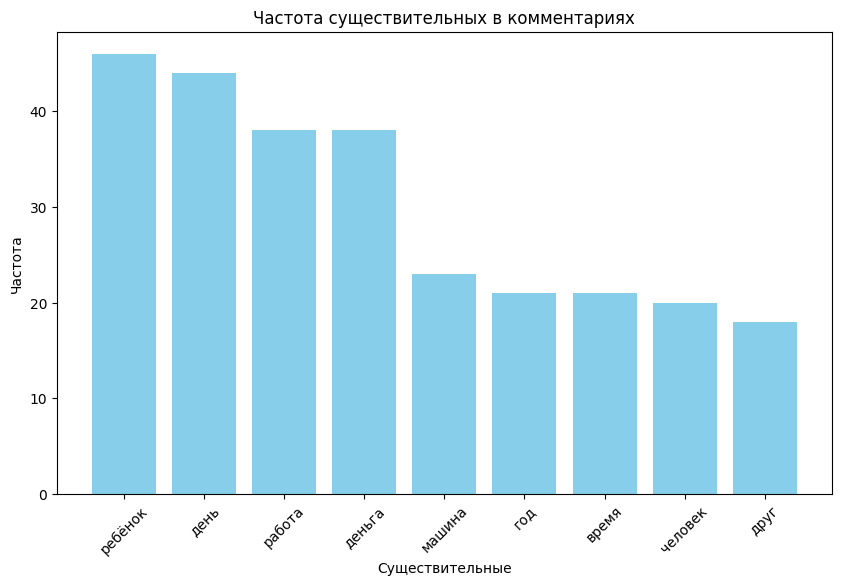

In [ ]:
top_nouns = a.most_common(10)
a, frequencies = zip(*top_nouns[1:])
plt.figure(figsize=(10, 6))
plt.bar(a, frequencies, color='skyblue')
plt.xlabel('Существительные')
plt.ylabel('Частота')
plt.title('Частота существительных в комментариях')
plt.xticks(rotation=45)
plt.show()

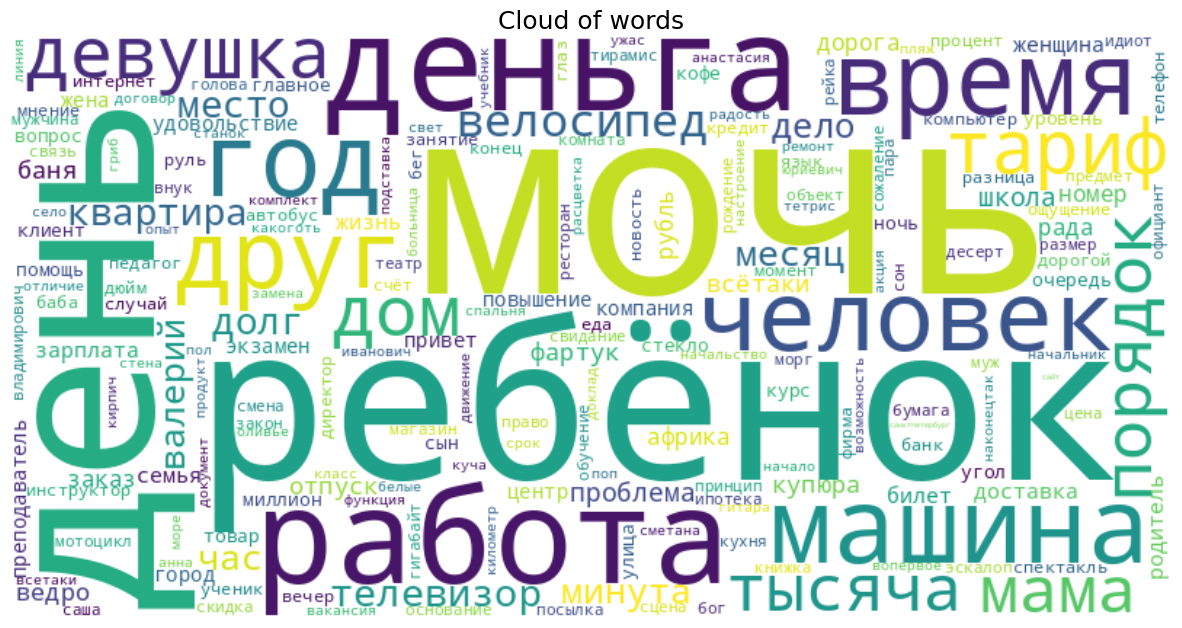

In [ ]:
noun_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(a)
plt.figure(figsize=(15,10))
plt.imshow(noun_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title ('Cloud of words',fontsize = 18)
plt.show()

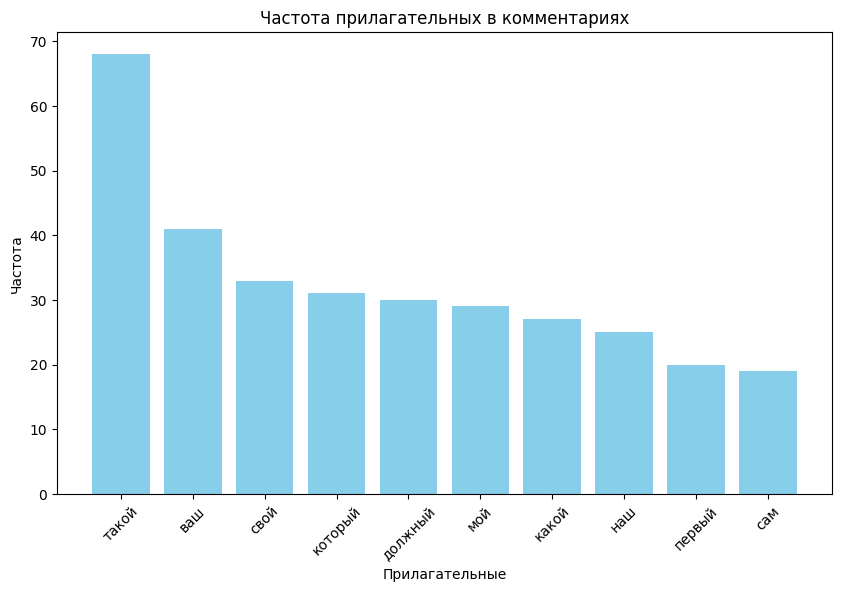

In [ ]:
top_adjectives = b.most_common(10)
b, frequencies = zip(*top_adjectives)
plt.figure(figsize=(10, 6))
plt.bar(b, frequencies, color='skyblue')
plt.xlabel('Прилагательные')
plt.ylabel('Частота')
plt.title('Частота прилагательных в комментариях')
plt.xticks(rotation=45)
plt.show()

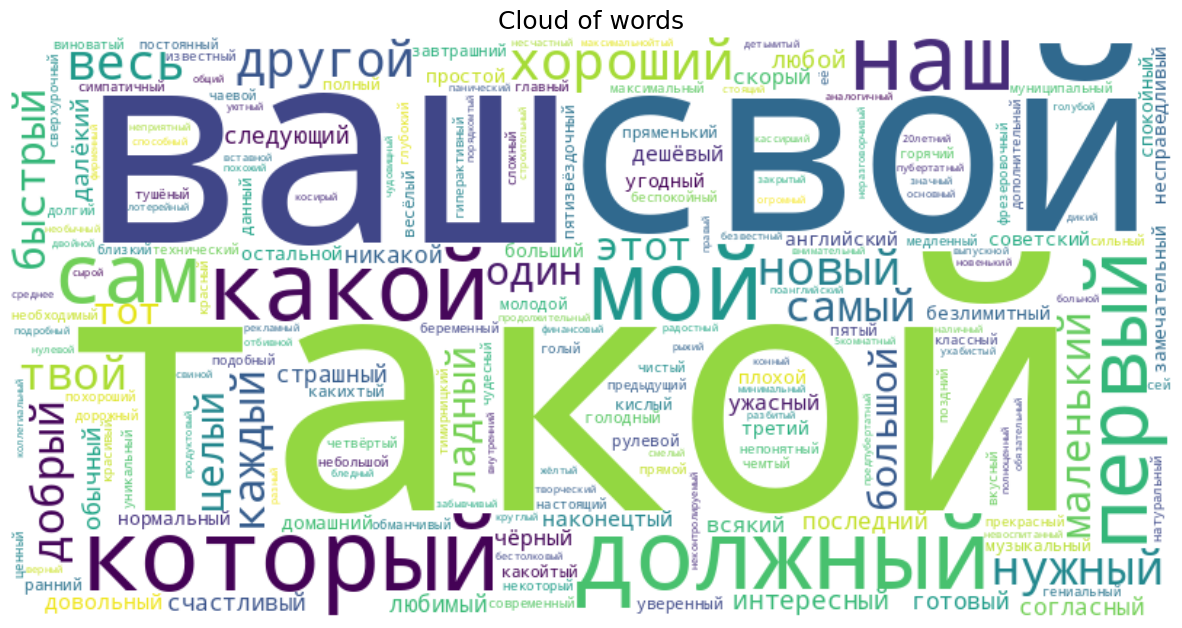

In [ ]:
adjective_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(b)
plt.figure(figsize=(15,10))
plt.imshow(adjective_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title ('Cloud of words',fontsize = 18)
plt.show()

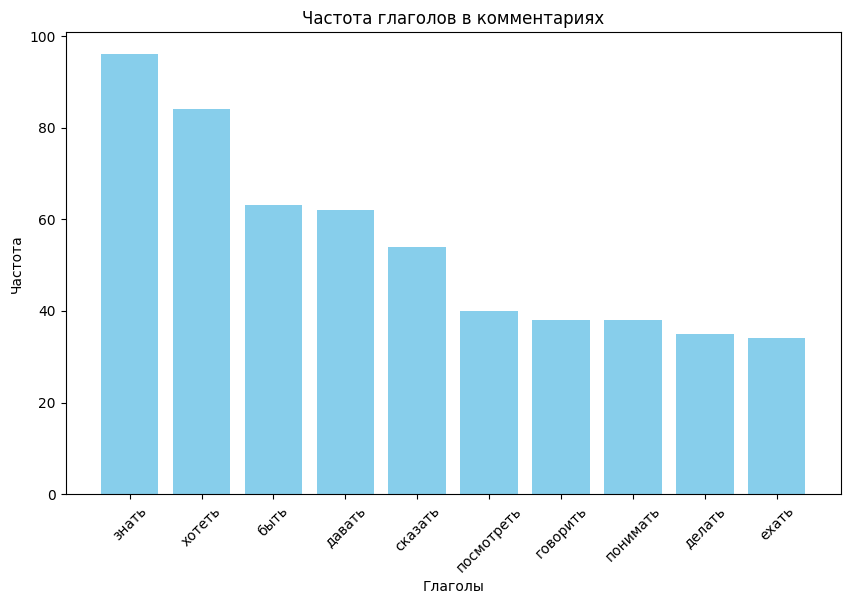

In [ ]:
top_verbs = c.most_common(10)
c, frequencies = zip(*top_verbs)
plt.figure(figsize=(10, 6))
plt.bar(c, frequencies, color='skyblue')
plt.xlabel('Глаголы')
plt.ylabel('Частота')
plt.title('Частота глаголов в комментариях')
plt.xticks(rotation=45)
plt.show()

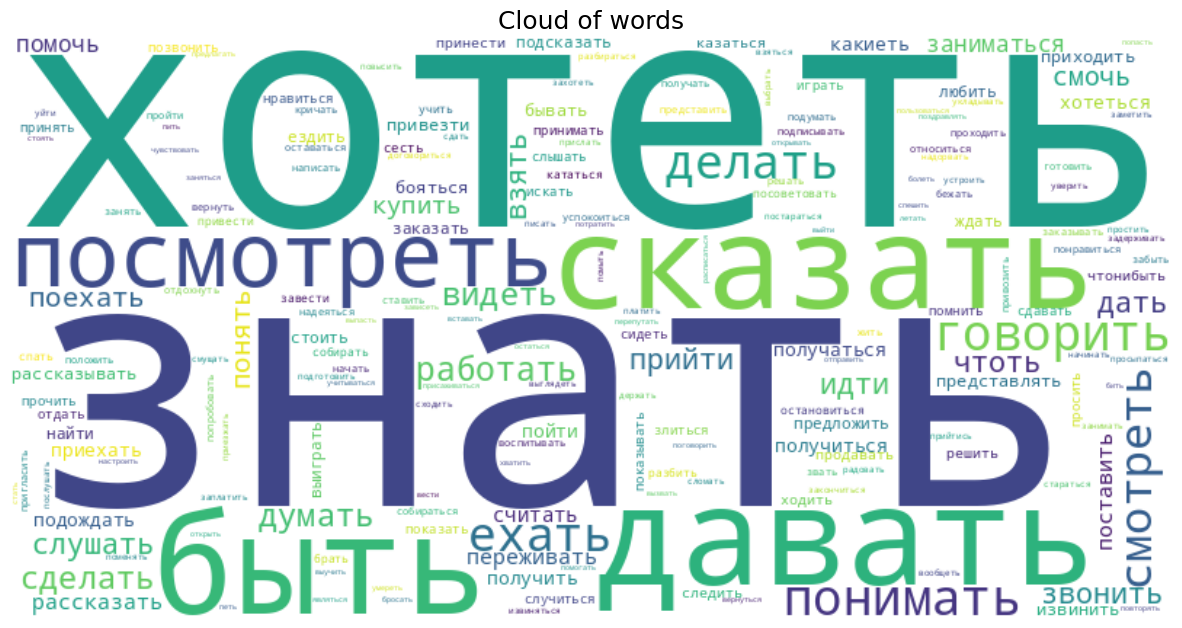

In [ ]:
verb_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(c)
plt.figure(figsize=(15,10))
plt.imshow(verb_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title ('Cloud of words',fontsize = 18)
plt.show()

In [ ]:
d = sum(a.values())
print(d)
e = sum(b.values())
print(e)
f = sum(c.values())
print(f)


2278
1019
2577


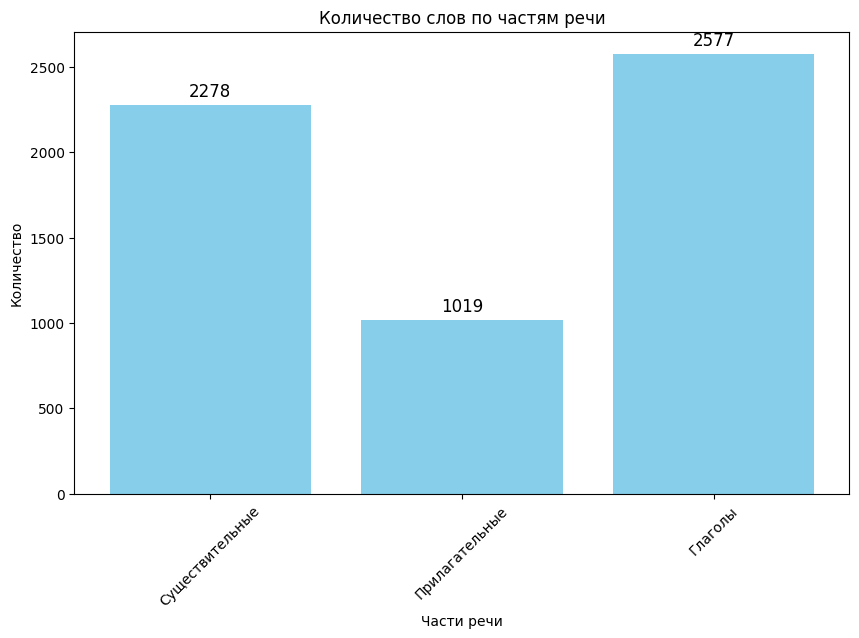

In [ ]:
categories = ['Существительные','Прилагательные','Глаголы']
qty = [d,e,f]
plt.figure(figsize=(10,6))
plt.bar(categories,qty, color='skyblue')
plt.xlabel('Части речи')
plt.ylabel('Количество')
plt.title('Количество слов по частям речи')
plt.xticks(rotation=45)
for i, g in enumerate(qty):
    plt.text(i, g+ max(qty) * 0.02, str(g), ha='center', fontsize=12)
plt.show()


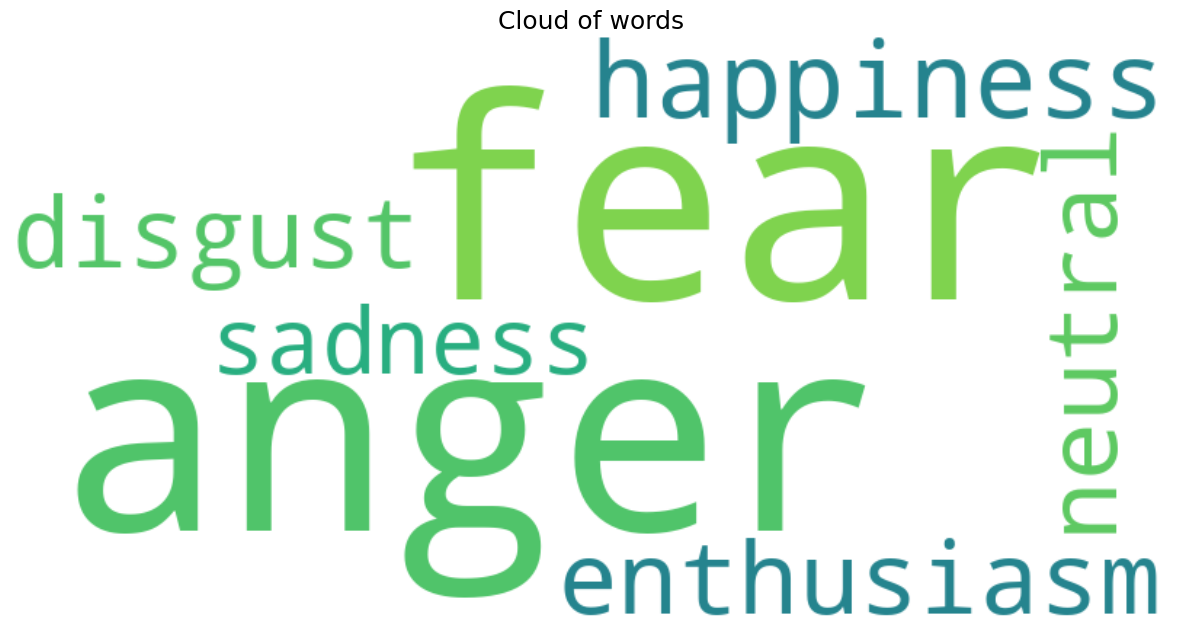

In [ ]:
emotion_text = ' '.join(df['emotion'])
emotion_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(emotion_text)
plt.figure(figsize=(15,10))
plt.imshow(emotion_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title ('Cloud of words',fontsize = 18)
plt.show()

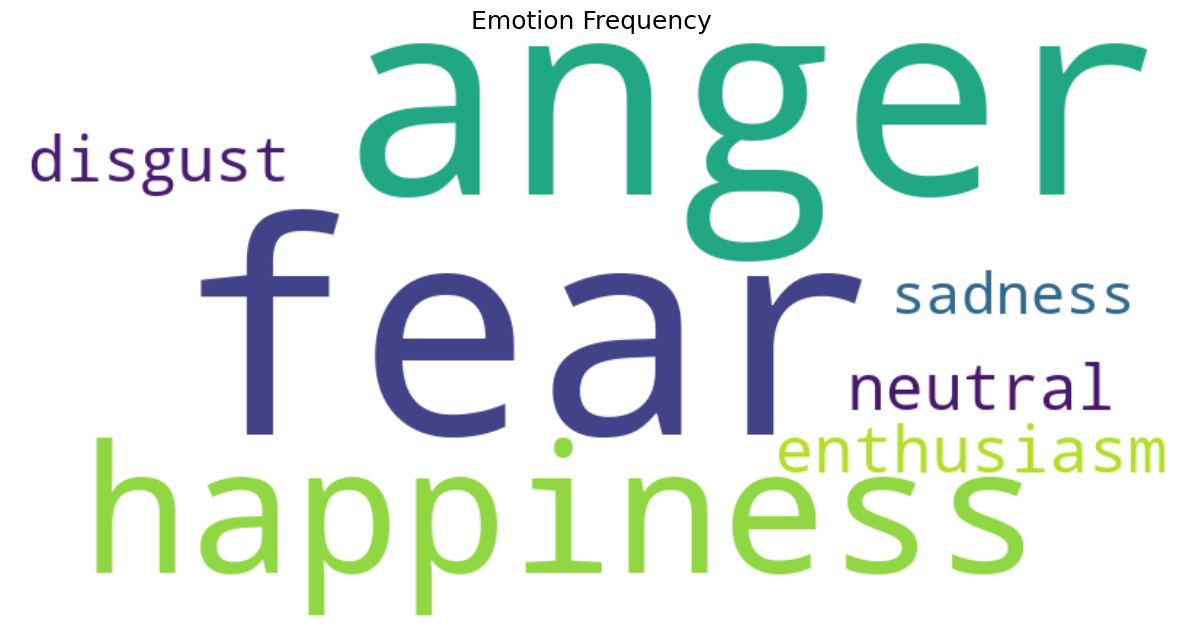

In [ ]:
word_frequency = Counter(' '.join(df['emotion']).split())
emotion_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency)
plt.figure(figsize=(15,10))
plt.imshow(emotion_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title ('Emotion Frequency',fontsize = 18)
plt.show()